# Code for Figure 4 part (b) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [4]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']
vals = np.zeros((10, 7, 5))
for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            try:
                if penlevel == 0.5:
                    vals[k, i, j] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
                else:
                    vals[k, i, j] = pd.read_csv('Results/Fuel1_Solar35_Wind3_Curves/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
            except:
                print('Zero for ', penlevel, scen1, scen2)
        if penlevel == 0.5:
            vals[9, 6, 4] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel'+str(penlevel)+'_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
        else:
            vals[k, 6, 4] = pd.read_csv('Results/Fuel1_Solar35_Wind3_Curves/fuel1_solar3.5_wind3_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel'+str(penlevel)+'_storage_stats_20220408.csv')['Storage Rate Result'].values[0]



In [5]:
df_100p = pd.DataFrame(vals[9, :, :], index=['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'],
            columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BAU'])

In [6]:
df_100p


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BAU
_Timers12am_noWPcontrol,24540.0,15721.0,7439.0,7693.0,0.0
_Timers9pm_noWPcontrol,14214.0,8686.0,7427.0,7694.0,0.0
_TimersRandom_noWPcontrol,14673.0,8833.0,7424.0,7680.0,0.0
_TimersNone_noWPcontrol,18194.0,11424.0,8072.0,8359.0,0.0
_TimersNone_WPcontrol_minpeak,19221.0,12305.0,12256.0,10860.0,0.0
_TimersNone_WPcontrol_avgem,18193.0,11317.0,7923.0,8270.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,10897.0


In [10]:
df_100p.max()

UniversalHome       24540.0
HighHome            15721.0
LowHome_HighWork    12256.0
LowHome_LowWork     10860.0
BAU                 10897.0
dtype: float64

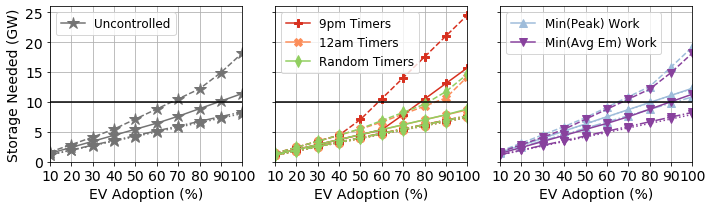

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']
markers=['P', 'X', 'd', '*', '^', 'v']
ms = [8,8,8,12,8,8]

for idx_control in [1, 0, 2]: # timers
    for idx_access in range(4):
        axes[1].plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals[:, idx_control, idx_access], linestyle=lines[idx_access], marker=markers[idx_control],  markersize=ms[idx_control], color=colors[idx_control])

axes[1].set_yticks(np.arange(0, 26, 5))
axes[1].set_yticklabels(np.arange(0, 26, 5), fontsize=14)
axes[1].set_ylim([0, 26])
axes[1].set_axisbelow(True)        
axes[1].grid()


legend_elements=[Line2D([0], [0], marker=markers[0], color=colors[0], label='9pm Timers', markerfacecolor=colors[0], markersize=ms[0]), 
                 Line2D([0], [0], marker=markers[1], color=colors[1], markerfacecolor=colors[1], markersize=ms[1], label='12am Timers'),
                 Line2D([0], [0], marker=markers[2], color=colors[2], markerfacecolor=colors[2], markersize=ms[2], label='Random Timers')]
axes[1].legend(handles=legend_elements, loc='upper left', fontsize=12)


for idx_control in [3]: # uncontrolled + bau
    for idx_access in range(4):
        axes[0].plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals[:, idx_control, idx_access], linestyle=lines[idx_access], markersize=ms[idx_control], marker=markers[idx_control], color=colors[idx_control])
legend_elements=[Line2D([0], [0], marker=markers[3], color=colors[3], label='Uncontrolled', markersize=ms[3])]
axes[0].legend(handles=legend_elements, loc='upper left', fontsize=12)

for idx_control in [4, 5]: # workplace
    for idx_access in range(4):
        axes[2].plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals[:, idx_control, idx_access], linestyle=lines[idx_access], marker=markers[idx_control], markersize=ms[idx_control], color=colors[idx_control])

axes[2].set_axisbelow(True)        
axes[2].grid()


legend_elements=[Line2D([0], [0], marker=markers[4], color=colors[4], markerfacecolor=colors[4], markersize=ms[4], label='Min(Peak) Work'), 
                 Line2D([0], [0], marker=markers[5], color=colors[5], markerfacecolor=colors[5], markersize=ms[5], label='Min(Avg Em) Work')]
axes[2].legend(handles=legend_elements, loc='upper left', fontsize=12)


for i in range(3):
    axes[i].set_xlim([10, 100])
    axes[i].set_xticks(np.arange(10, 101, 10))
    axes[i].set_xticklabels(np.arange(10, 101, 10), fontsize=14)
    axes[i].set_xlabel('EV Adoption (%)', fontsize=14)
axes[0].set_ylabel('Storage Needed (GW)', fontsize=14)
axes[0].set_axisbelow(True)        
axes[0].grid()
axes[0].set_yticks(np.arange(0, 26, 5))
axes[0].set_yticklabels(np.arange(0, 26, 5), fontsize=14)

for i in range(3):
    axes[i].axhline(10, color='k')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4b_v2_2035.pdf', bbox_inches='tight')
plt.show()
